In [ ]:
# One-hot encoding

## sklearn의 OneHotEncoder 사용
- 입력 값으로 2차원 데이터가 필요하다
- 원/핫 인코딩의 결과는 밀집행렬(Dense Matrix)이기 때문에 다시 희소행렬(Parse Matrix)로 변환해야함

In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

maker = ['Samsung','LG','Apple','Sony']
maker = np.array(maker).reshape(-1,1)
encoder = OneHotEncoder()
encoder.fit(maker)
one_hot = encoder.transform(maker)
print(one_hot) # 원핫 인코딩 결과 밀집행렬
print(one_hot.toarray())

[['Samsung']
 ['LG']
 ['Apple']
 ['Sony']]
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### OneHotEncoder 결과 데이터 프레임에 적용

In [5]:
import pandas as pd

df = pd.DataFrame({'maker': ['Samsung','LG','Apple','Sony']})
encoded = OneHotEncoder().fit_transform(df['maker'].values.reshape(-1,1))
encoded = encoded.toarray().astype(int)
df[['maker-apple','maker-LG','maker-Samsung','maker-Sony']] = encoded
print(df)

     maker  maker-apple  maker-LG  maker-Samsung  maker-Sony
0  Samsung            0         0              1           0
1       LG            0         1              0           0
2    Apple            1         0              0           0
3     Sony            0         0              0           1


## pandas의 get_dummies() 사용

In [6]:
df = pd.DataFrame({'maker': ['Samsung','LG','Apple','Sony']})
result = pd.get_dummies(df, columns=['maker'])
print(result)

   maker_Apple  maker_LG  maker_Samsung  maker_Sony
0        False     False           True       False
1        False      True          False       False
2         True     False          False       False
3        False     False          False        True


# Label encoding

## sklearn의 LabelEncoder 사용

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

language = ['Java','Python','C#','Pascal']
df = pd.DataFrame({'Language':language})
display(df)
encoded = LabelEncoder().fit_transform(language)
print('라벨 인코딩 결과')
#print( encoded)
df['Language'] = encoded
display(df)

,Language
0,Java
1,Python
2,C#
3,Pascal


라벨 인코딩 결과


,Language
0,1
1,3
2,0
3,2


## Pandas의 map() 사용

In [13]:
language = ['Java','Python','C#','Pascal']
df = pd.DataFrame({'Language':language})
map_data = { v:i for i,v in enumerate(np.sort(df['Language'].unique()))}
df['Language'] = df['Language'].map(map_data)
print(df)

   Language
0         1
1         3
2         0
3         2


# 데이터 스케일링

## 표준화 (Standardization)

In [23]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
print(type(iris))
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.mean()) # 컬럼 평균
print(iris_df.std()) # 컬럼 표편
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled_df= pd.DataFrame(iris_scaled, columns=iris.feature_names)
display(iris_scaled_df)

print(iris_scaled.mean())
print(iris_scaled_df.std())

<class 'sklearn.utils._bunch.Bunch'>
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


-1.4684549872375404e-15
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## 표준화를 통한 이상치 데이터 처리
- 이상치 데이터 확인
- 최대값, 최소값 범위를 벗어나는 값을 이상치 데이터로 간주한다

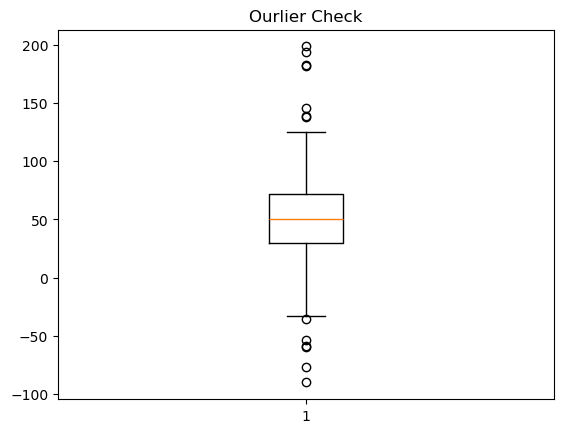

[77.13206433  2.07519494 63.36482349 74.88038825 49.85070123 22.47966455
 19.80628648 76.05307122 16.91108366  8.83398142 68.53598184 95.33933462
  0.39482663 51.21922634 81.26209617 61.25260668 72.17553174 29.18760682
 91.77741225 71.45757834 54.2544368  14.21700476 37.33407601 67.41336151
 44.18331744 43.40139933 61.77669785 51.31382426 65.03971819 60.10389534
 80.52231968 52.16471524 90.86488808 31.9236089   9.04593493 30.07000566
 11.39843619 82.86813263  4.68963194 62.62871483 54.75861559 81.92869957
 19.89475397 85.68503025 35.16526394 75.46476915 29.59617069 88.39364796
 32.55116378 16.50158977] [50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50.] [139.25292439 109.34603746 182.11056578 115.11520196 138.41144487
 194.42607122 198.76254749 145.63045471 182.61228438 125.13741342] [-59.73716482 -90.28317603 -53.45579488 -59.0201363   -3.92817672
 -35.71817586  -7.96130902 -30.54599183 -33.0719312  -77.38302962]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

# 데이터 생성
spread = np.random.rand(50) * 100 # [0,100)사이의 값 50개
center = np.ones(25) *50 #50(중앙값)25개
flier_high =np.random.rand(10) * 100 + 100 # [100,200) 사이의 값 10개
flier_low =np.random.rand(10) * - 100 # (-100,0] 사이의 값 10개

data = np.concatenate([spread, center, flier_high, flier_low])


plt.boxplot(data)
plt.title('Ourlier Check')
plt.show()
print(spread, center, flier_high, flier_low)

std.dev(StandardScaler):1.00
mean(StandardScaler):1.00
std.dev(RoburstScaler):1.23
mean(RoburstScaler):1.23


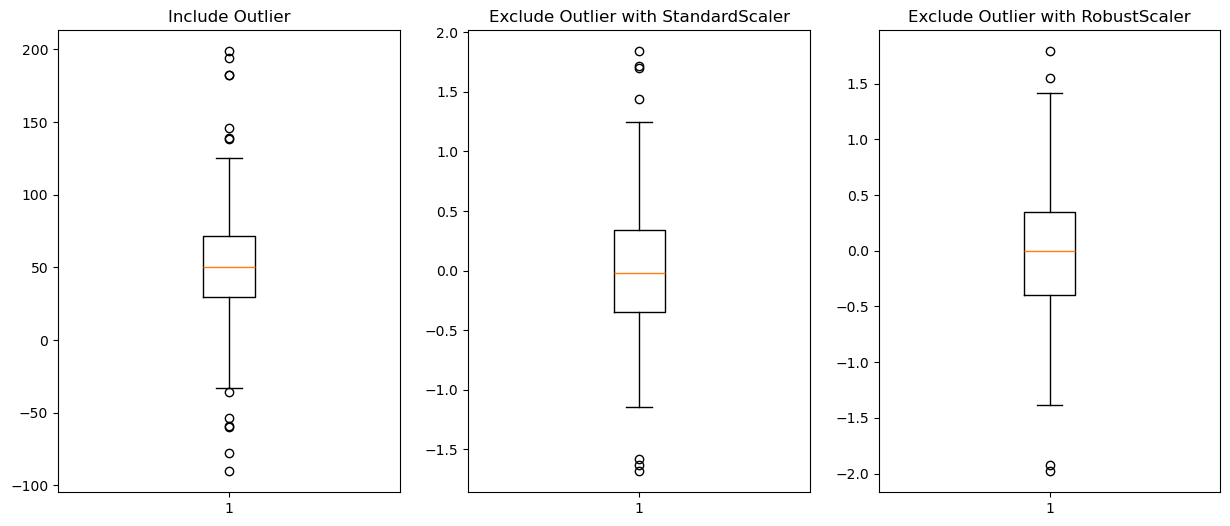

In [30]:
from sklearn.preprocessing import StandardScaler, RobustScaler
data1 = StandardScaler().fit_transform(data.reshape(-1,1))
data2 = RobustScaler().fit_transform(data.reshape(-1,1))


print(f'std.dev(StandardScaler):{np.std(data1):.2f}')
print(f'mean(StandardScaler):{np.std(data1):.2f}')
print(f'std.dev(RoburstScaler):{np.std(data2):.2f}')
print(f'mean(RoburstScaler):{np.std(data2):.2f}')

except_outlier1 = np.logical_and(data1 >= -2, data1 <= 2) 
# 이 구간안에 들어가는 데이터를 이상치를 제거한 데이터로 봄, 표준화 한 z-score가 (+/-)2sigma 안에 있으면 95%의 신뢰구간 내에 있다고 간주 #  이 구간 내 데이터만 선택하면 이상치를 제거할 수 있다
except_outlier2 = np.logical_and(data2 >= -2, data2 <= 2)

plt.figure(figsize=(15,6))
plt.subplot (1,3,1)
plt.boxplot(data)
plt.title('Include Outlier')

plt.subplot (1,3,2)
plt.boxplot(data1[except_outlier1])
plt.title('Exclude Outlier with StandardScaler')
plt.subplot (1,3,3)
plt.boxplot(data2[except_outlier2])
plt.title('Exclude Outlier with RobustScaler')
plt.show()

## 정규화(Normalization)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns = iris.feature_names)
display(iris_scaled_df)
print('정규화된 컬럼 최소값')
print(iris_scaled_df.min())
print('정규화된 컬럼 최소값')
print(iris_scaled_df.max())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


정규화된 컬럼 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
정규화된 컬럼 최소값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


# 불균형 데이터 처리

In [2]:
!pip install imblearn

In [4]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.11.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn


## imbalanced 모듈로딩

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

## 불균형데이터 생성

In [4]:
x, y = make_classification(n_samples=10000,n_features=5,weights=[0.99], flip_y = 0, random_state=2 )# feature = x, weight 이진분류 데이터 비율을 99대 1의 비율로 만들어라
# flip_y = y값이 임의로 변경되는 샘플의 비율, 값이 크면 예측레이블에 노이즈가 생기고 분류문제를 어렵게 만든다.
print(Counter(y))

Counter({0: 9900, 1: 100})


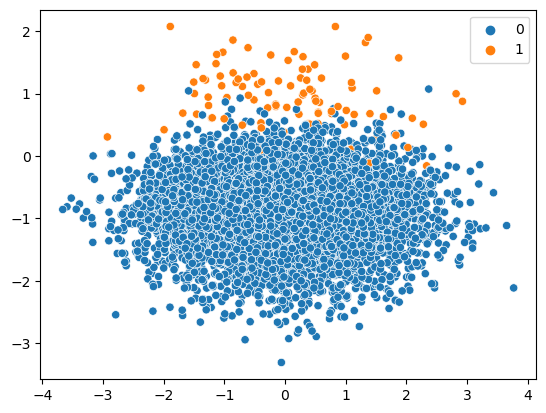

In [5]:
sns.scatterplot(x=x[:,3],y=x[:,4],hue=y) 
plt.show()

## Under Sampling

### RandomUnderSampling

In [6]:
# sampling_strategy='majority'다수 집단에서 샘플링해 소수 집단의 수와 동일하게 맞춘다.
under_sample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = under_sample.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


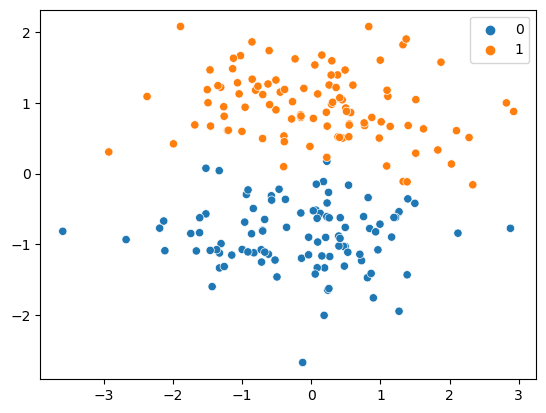

In [7]:
sns.scatterplot(x=x_under[:,3],y=x_under[:,4],hue=y_under) 
plt.show()

Counter({0: 250, 1: 100})


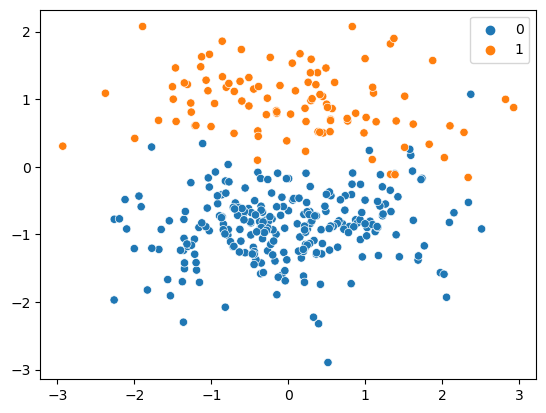

In [8]:
# sampling_strategy의 값을 0~1 사이의 값으로 지정하면 (소수 집단 데이터/다수 집단 데이터 수)의 비율 값으로 다수 집단 데이터에서 샘플링된다. ex) 0.4 = 100 /250 (다수집단데이터 수)
under_sample = RandomUnderSampler(sampling_strategy=0.4)
x_under, y_under = under_sample.fit_resample(x,y)
print(Counter(y_under))
sns.scatterplot(x=x_under[:,3],y=x_under[:,4],hue=y_under) 
plt.show()

### Tomek Link
- sampling_strategy 파라메터 값
- 'majority' : 다수 집단 데이터만 리샘플링
- 'not majority' : 다수 집단을 제외한 나머지 범주 데이터를 리샘플링
- 'not minortiy' : 소수 집단을 제외한 나머지 범주 데이터를 리샘플링
- 'all' : 모든 범주 데이터를 리샘플링
- 'auto' : 'not minority'와 동일

Counter({0: 9892, 1: 100})


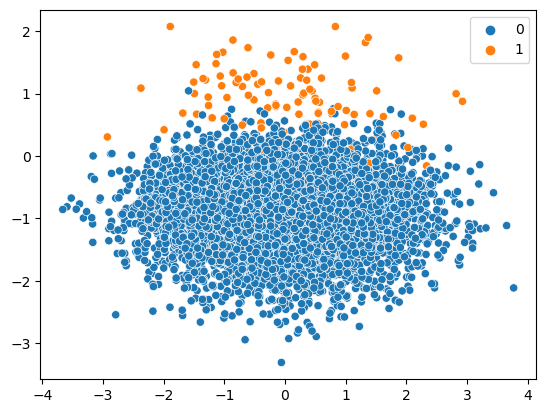

In [15]:
tomek_link = TomekLinks(sampling_strategy='auto')

# fit_resample 메서드를 호출하여 언더샘플링된 데이터 생성
x_under, y_under = tomek_link.fit_resample(x, y)

# 언더샘플링된 데이터의 클래스 분포 확인
print(Counter(y_under))
sns.scatterplot(x=x_under[:,3],y=x_under[:,4],hue=y_under) 
plt.show()

## Over Sampling

### Random Over Sampling

Counter({0: 9900, 1: 9900})


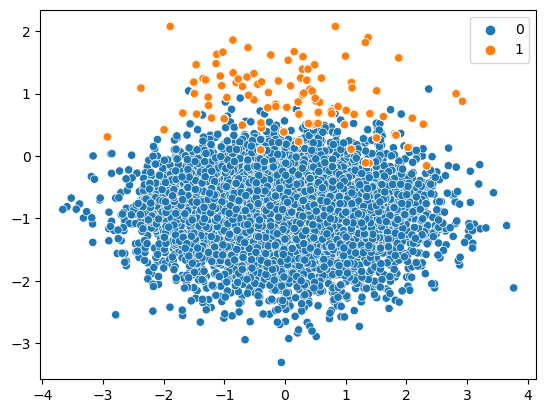

In [18]:
# 동일데이터에 대해 반복적으로 복제해서 만들었기 때문에 산점도가 원본데이터와 같아 보인다.
over_sample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = over_sample.fit_resample(x, y)
print(Counter(y_under))
sns.scatterplot(x=x_over[:,3],y=x_over[:,4],hue=y_over) 
plt.show()

### SMOTE

Counter({0: 9900, 1: 3960})


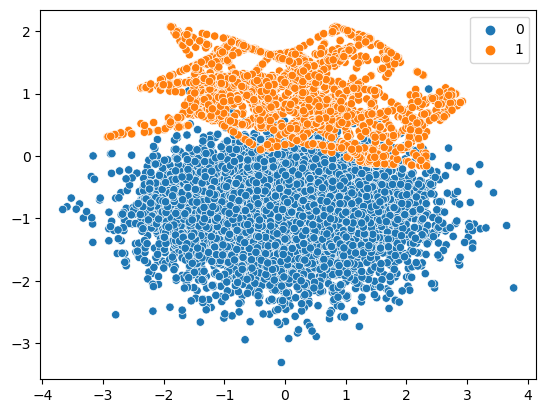

In [20]:
smote_sample = SMOTE(sampling_strategy=0.4) # 다수클래스 샘플수 9900 * 0.4 = 3960 = 소수클래스샘플 수
x_over, y_over = smote_sample.fit_resample(x,y)
print(Counter(y_over))
sns.scatterplot(x=x_over[:,3],y=x_over[:,4],hue=y_over) 
plt.show()

## Cost Sensitive Learning

In [ ]:
- 라벨 가중치 옵션 사용
- class weight 옵션
- {클래스:가중치 값}

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def evaluate_model (x,y,model):
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=1) # 총 5번의 교차검증을 수행하겠따
    scores = cross_val_score(model, x, y, scoring='precision',cv=cv, n_jobs=-1)
    return scores

In [26]:
model = RandomForestClassifier(n_estimators=100)
scores = evaluate_model(x,y,model)
print(f'Mean Precision No Weight: {np.mean(scores):.3f}')

Mean Precision No Weight: 0.908


In [28]:
weights = {0:1,1:80}
model = RandomForestClassifier(n_estimators=100, class_weight=weights)
scores = evaluate_model(x,y,model)
print(f'Mean Precision yes Weight: {np.mean(scores):.3f}')

Mean Precision yes Weight: 0.922
